# **Experiment Notebook**



In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

## A. Project


Project name = Bank Transaction Analysis

Type = Regression

<hr>

## B. Business Understanding


### B.1 Business use case

The bank aims to optimise the timing of credit card reward promotions by predicting transaction hours. Currently, promotional messages for category-specific rewards (e.g., Earn 3X points on dining today!) are sent at random times, resulting in low engagement. By predicting when customers are most likely to make specific types of purchases, the bank can send these promotions 1-2 hours before peak transaction times, increasing the likelihood of card usage and customer engagement.

### B.2 Business expectations

The model should predict transaction hours with sufficient accuracy to inform a targeted marketing schedule. While perfect timing predictions are not necessary, the model should identify clear patterns in transaction timing across different categories (dining, shopping, groceries, etc.) and customer segments (age groups, weekday vs weekend). These insights will help create a structured promotional schedule, with messages timed to arrive before typical purchase times. Success would be measured by increased card usage in promoted categories during the hours following promotional messages.


<hr>

## C. Data Understanding


### C.0 Import Packages

In [2]:
 # Pandas for data handling
import pandas as pd

# Scikit Learn for ML training
import sklearn

# Altair for plotting
import altair as alt

# Numpy for data handling
import numpy as np

# Seaborn for plotting
import seaborn as sns

# Matplotlib for plotting
import matplotlib.pyplot as plt

# Datetime for date handling
from datetime import datetime

<hr>

### C.1   Load Datasets

> Note! This regression problem uses the whole dataset 'Full-dataset.csv' created in the 'Bank_project-EDA' notebook.

In [3]:
# Load dataset

transactions_df = pd.read_csv('Full-dataset.csv')

In [4]:
# Check dataset information
print("Dataset Shape:", transactions_df.shape)
print("\nFeature Types:\n", transactions_df.dtypes)
print("\nMissing Values:\n", transactions_df.isnull().sum())

Dataset Shape: (816859, 15)

Feature Types:
 cc_num             float64
acct_num           float64
trans_num           object
unix_time            int64
category            object
amt                float64
is_fraud             int64
merchant            object
merch_lat          float64
merch_long         float64
region              object
gender              object
age_group           object
trans_date_time     object
amt_log            float64
dtype: object

Missing Values:
 cc_num                 0
acct_num               0
trans_num              0
unix_time              0
category               0
amt                    0
is_fraud               0
merchant               0
merch_lat          87039
merch_long         87039
region                 0
gender                 0
age_group              0
trans_date_time        0
amt_log                0
dtype: int64


In [5]:
# Check dataset

transactions_df

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,region,gender,age_group,trans_date_time,amt_log
0,6.584732e+15,8.436439e+11,1c3d17397d7149e2a955b4b2423b0748,1645882376,shopping_pos,9.38,1,Huffman-Washington,44.251847,-91.168351,rural,female,adult,2022-02-26 13:32:56,2.339881
1,6.584732e+15,8.436439e+11,c62ca420fef5ea197b496f861af29cd9,1645888457,gas_transport,1119.10,1,Morrison-Brown,44.433155,-92.259518,rural,female,adult,2022-02-26 15:14:17,7.021173
2,6.584732e+15,8.436439e+11,54bcc5a58d8bf272c64be31f2420e87e,1646050072,home,573.21,1,"Pierce, Gardner and Rich",42.990796,-91.185804,rural,female,adult,2022-02-28 12:07:52,6.352995
3,6.584732e+15,8.436439e+11,d660da6115de2a5b4621f5e64af9087f,1646052298,personal_care,553.55,1,"Farley, Herrera and Phillips",43.232627,-91.020145,rural,female,adult,2022-02-28 12:44:58,6.318157
4,6.584732e+15,8.436439e+11,e5901413138fc03a46fb79ddad1c7122,1646047130,travel,23.62,1,Smith-Aguilar,44.340716,-90.968698,rural,female,adult,2022-02-28 11:18:50,3.203559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816854,3.432520e+14,2.980270e+11,2a1e7680d91e51a60716064068577268,1670908006,personal_care,2.94,0,Monroe Ltd,28.019383,-81.794612,urban,male,senior,2022-12-13 05:06:46,1.371181
816855,3.432520e+14,2.980270e+11,09267380cfb24c33c7048fc9e9f87a6f,1669943329,kids_pets,6.43,0,Jimenez Group,27.065622,-82.343797,urban,male,senior,2022-12-02 01:08:49,2.005526
816856,3.432520e+14,2.980270e+11,1f70991b54083954b077b5711ebbfa0a,1665710553,home,6.41,0,Coleman-Fry,28.505515,-82.288554,urban,male,senior,2022-10-14 01:22:33,2.002830
816857,3.432520e+14,2.980270e+11,096f2c10cf3589b727d39bf1a3e36916,1670748794,personal_care,1252.96,0,Snow,NaN,NaN,urban,male,senior,2022-12-11 08:53:14,7.134062


<hr>

### C.2 Define Target variable

> Rationale: The hour of transaction is derived from the timestamp (trans_date_time) as it represents a crucial aspect of customer behaviour that directly impacts marketing effectiveness. While the dataset contains various transaction attributes, the temporal pattern of when customers make purchases is particularly valuable for optimising marketing initiatives. The hour variable, represented as a continuous value from 0 to 23, provides the right granularity for actionable insights without being overly specific (like minutes) or too broad (like time periods of day).

<hr>

### C.3 Explore Target variable

In [6]:
# Set the name of the target column

target_name = 'hour'

In [7]:
# Create hour column from trans_date_time

# Convert trans_date_time to datetime
transactions_df['trans_date_time'] = pd.to_datetime(transactions_df['trans_date_time'])

# Extract hour
transactions_df['hour'] = transactions_df['trans_date_time'].dt.hour

# Verify new column
print("\nHour value counts:")
print(transactions_df['hour'].value_counts().sort_index())


Hour value counts:
hour
0     26155
1     34245
2     41417
3     41613
4     41676
5     41864
6     41732
7     41697
8     41747
9     42117
10    42063
11    42542
12    42524
13    33967
14    26411
15    26238
16    26020
17    26163
18    26090
19    26008
20    26200
21    26177
22    26206
23    25987
Name: count, dtype: int64


Text(0, 0.5, 'Number of Transactions')

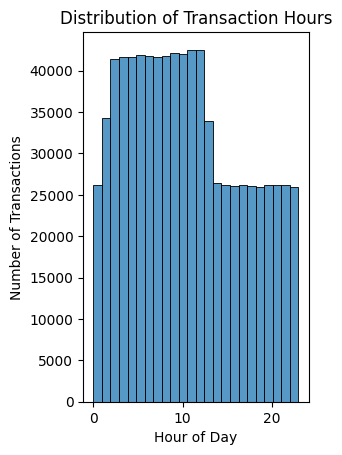

In [8]:
# Histogram of hours
plt.subplot(1, 2, 1)
sns.histplot(data=transactions_df, x='hour', bins=24)
plt.title('Distribution of Transaction Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')

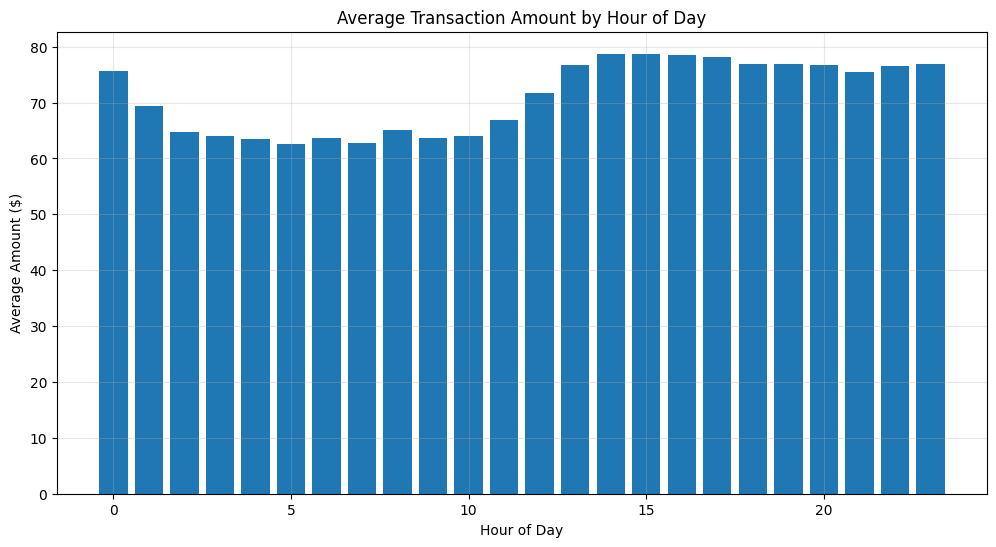


Hourly Average Amount Statistics:
            hour        amt
count  24.000000  24.000000
mean   11.500000  71.156326
std     7.071068   6.454604
min     0.000000  62.572428
25%     5.750000  64.088845
50%    11.500000  73.610795
75%    17.250000  76.858594
max    23.000000  78.736364


In [9]:
# Plot Average Amount by Hour

# Set figure size
plt.figure(figsize=(12, 6))

# Calculate average amount per hour
hourly_avg_amount = transactions_df.groupby('hour')['amt'].mean().reset_index()

# Create bar plot
plt.bar(hourly_avg_amount['hour'], hourly_avg_amount['amt'])
plt.title('Average Transaction Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Amount ($)')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Show plot
plt.show()

# Print summary statistics
print("\nHourly Average Amount Statistics:")
print(hourly_avg_amount.describe())

> Insights: The distribution of transaction hours reveals a clear bimodal pattern with peak activity during daytime hours (approximately hours 5-12) and a noticeable decline in the evening. The average transaction hour is 11.5 with a standard deviation of 7.07 hours, indicating significant spread throughout the day. Interestingly, the average transaction amount shows an inverse pattern, with higher amounts occurring during evening hours (peaks around hours 13-17) despite lower transaction volumes. This suggests that while fewer transactions occur in the evening, they tend to be of higher value.

> Considerations: A potential challenge for modeling is the wide spread of transaction hours, which could make precise predictions difficult. However, the clear patterns in both transaction frequency and average amount provide promising signals for our predictive model.

> Issues found: Possibly time zones considering the high activity during the night.

<hr>

### C.4 Explore Variables of Interest


#### C.4.a Feature "category"

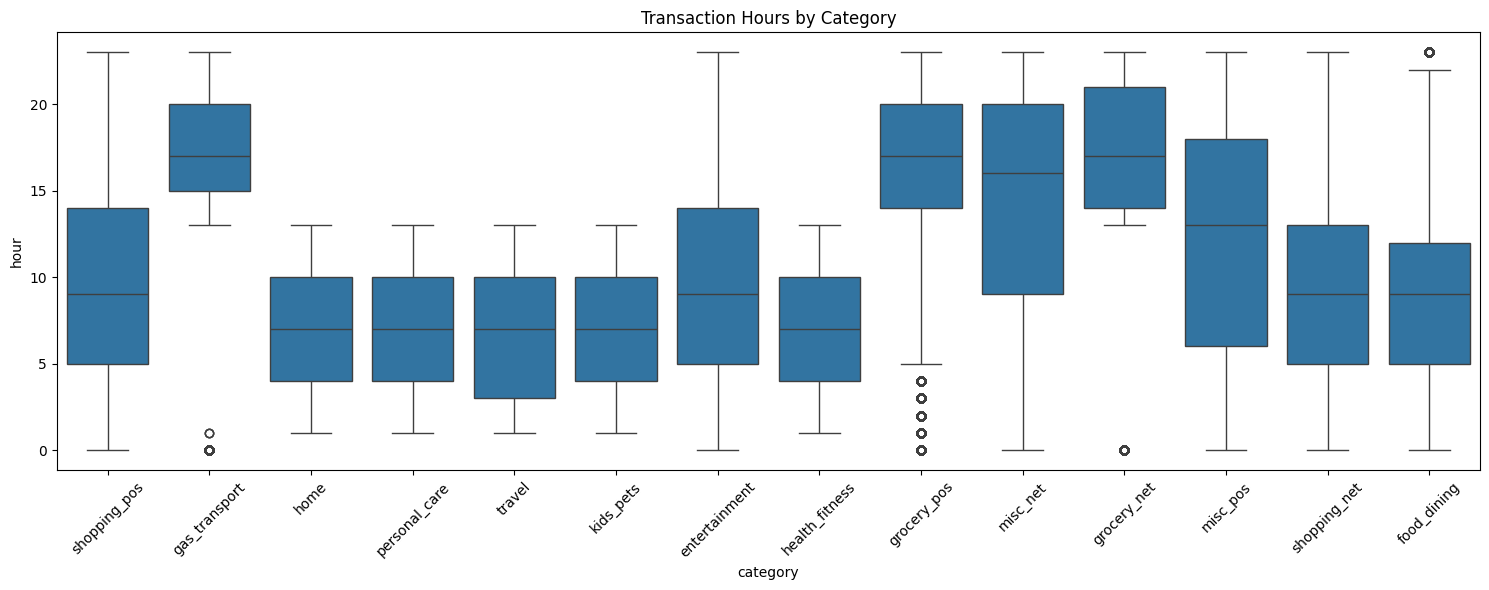

In [10]:
# Transaction hours by category
plt.figure(figsize=(15, 6))
sns.boxplot(data=transactions_df, x='category', y='hour')
plt.title('Transaction Hours by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

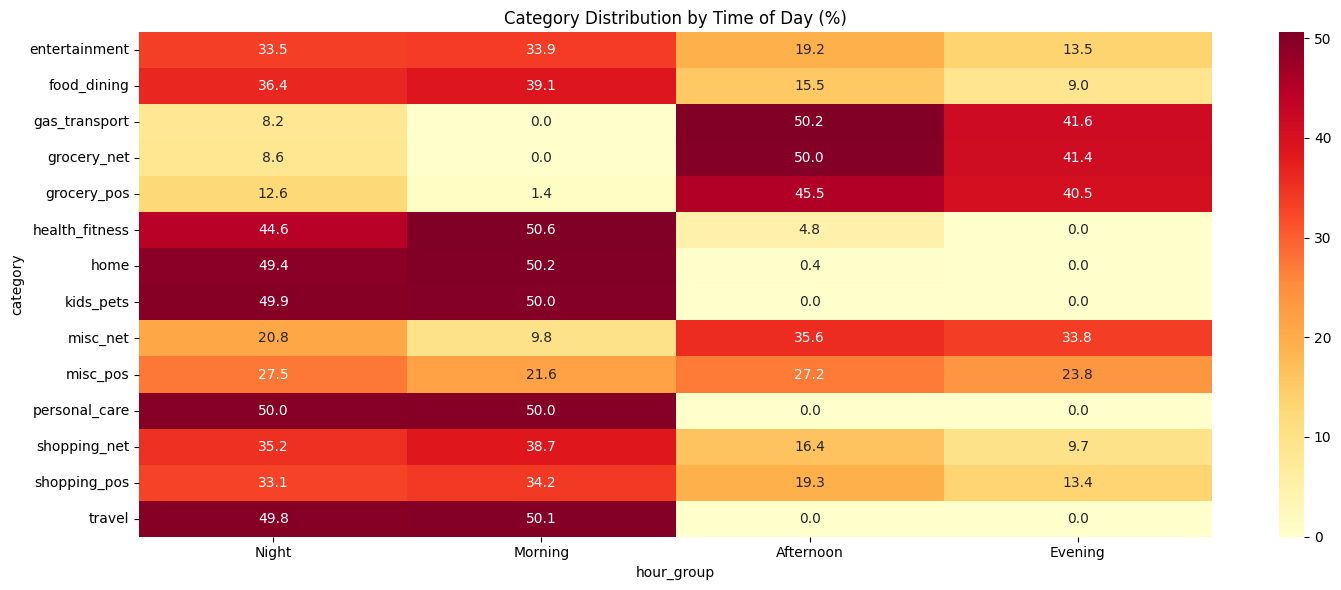

In [11]:
# Create hour groups for visualization

transactions_df['hour_group'] = pd.cut(transactions_df['hour'],
                                     bins=[-0.1, 6, 12, 18, 24],
                                     labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Category distribution by time of day
plt.figure(figsize=(15, 6))
category_hour = pd.crosstab(transactions_df['category'],
                           transactions_df['hour_group'],
                           normalize='index') * 100
sns.heatmap(category_hour, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Category Distribution by Time of Day (%)')
plt.tight_layout()
plt.show()

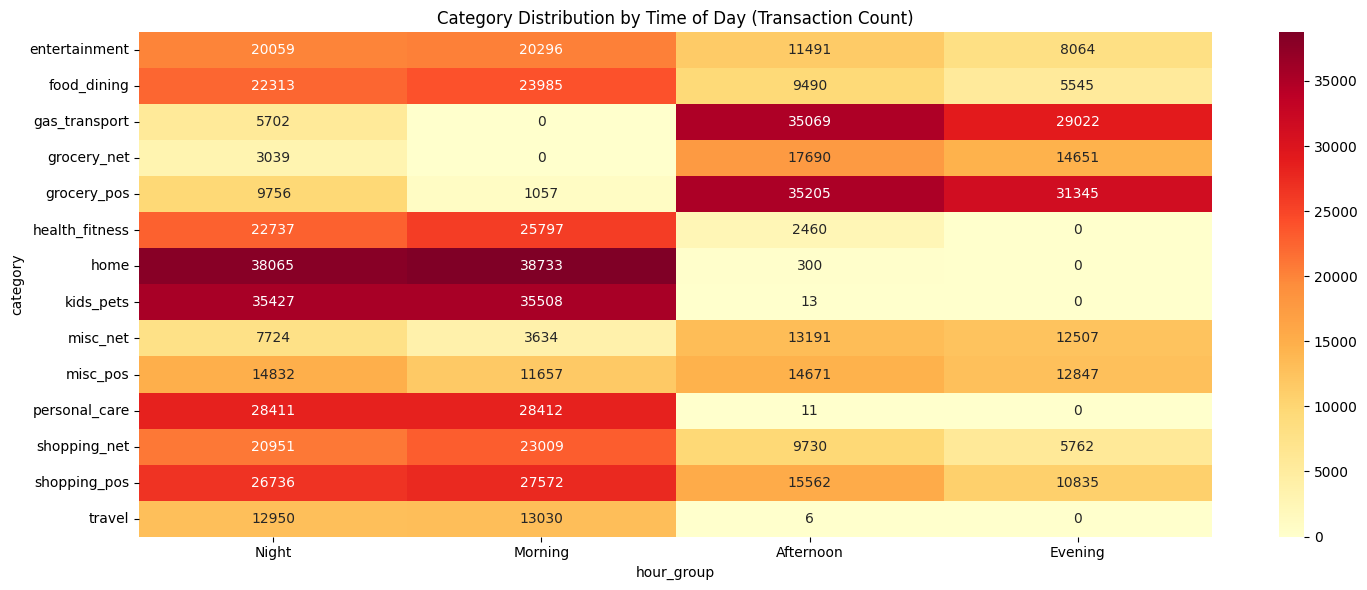


Total transactions per category:
category
shopping_pos      80705
grocery_pos       77363
home              77098
kids_pets         70948
gas_transport     69793
food_dining       61333
entertainment     59910
shopping_net      59452
personal_care     56834
misc_pos          54007
health_fitness    50994
misc_net          37056
grocery_net       35380
travel            25986
dtype: int64


In [12]:
# Create Categoty Distribution ny Time of Day Heatmap

# Category distribution by time of day
plt.figure(figsize=(15, 6))
category_hour = pd.crosstab(transactions_df['category'],
                           transactions_df['hour_group'])  # Removed normalize='index'
sns.heatmap(category_hour, annot=True, fmt='g', cmap='YlOrRd')  # Changed fmt to 'g' for integers
plt.title('Category Distribution by Time of Day (Transaction Count)')
plt.tight_layout()
plt.show()

# Print total transactions per category
print("\nTotal transactions per category:")
print(category_hour.sum(axis=1).sort_values(ascending=False))

> Insights: The transaction categories show distinct temporal patterns and varying volumes. Shopping and grocery categories dominate with over 77,000 transactions each, while travel has the lowest volume at around 26,000 transactions. The heatmap reveals clear timing preferences: health, home, kids/pets, and personal care transactions are heavily concentrated in morning hours (approximately 50% each), while grocery and gas transactions show strong afternoon/evening patterns (40-50%). Entertainment and food dining show more even distribution throughout the day, though slightly weighted toward morning hours. This clear categorization of timing patterns suggests that transaction categories could be strong predictors of transaction hours.

> Considerations: The transaction distribution across categories varies significantly, from over 80,000 transactions for shopping_pos to around 26,000 for travel. This imbalance should be considered when interpreting model predictions, as the model might perform better for categories with more data.

> Issues found: The presence of both 'net' and 'pos' versions of some categories (shopping, grocery, misc) might create redundancy in the features and could potentially lead to multicollinearity. Also, some categories show extremely low or zero transactions during certain time periods (like health_fitness with zero evening transactions), which could make predictions less reliable for these combinations.

#### C.4.b Feature "age_group, gender and region"

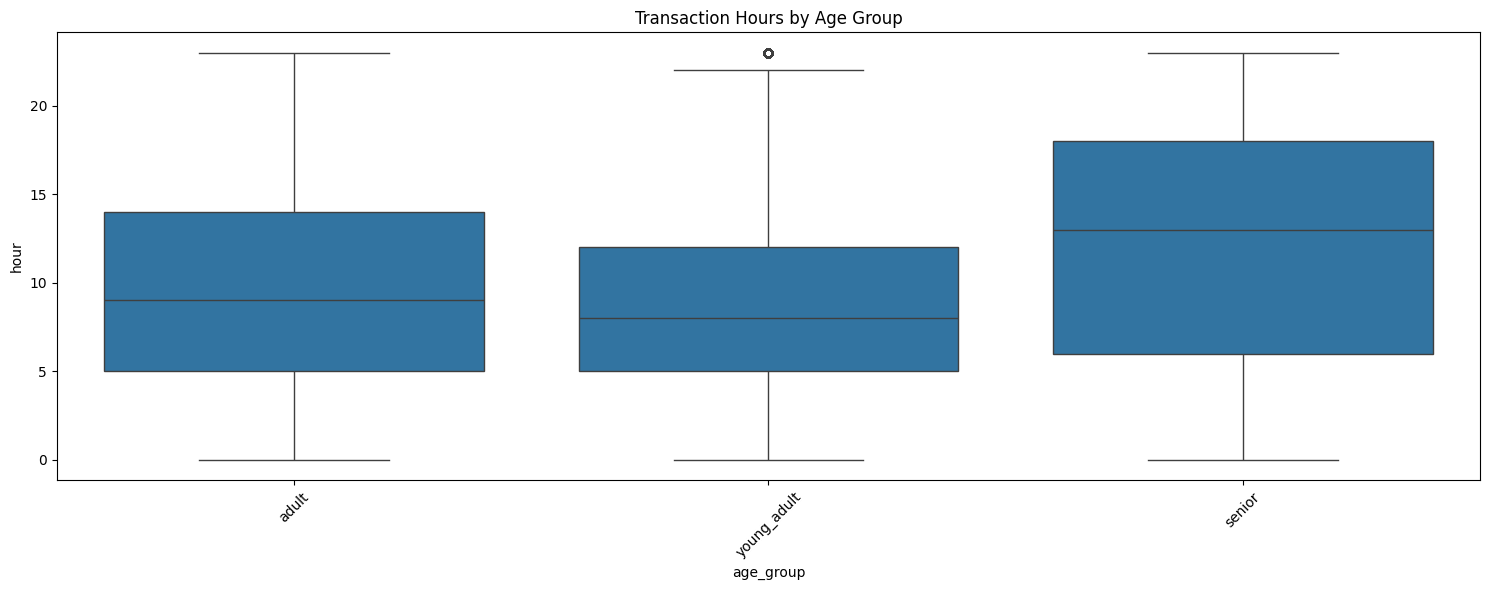

In [13]:
# Plot transaction hours by age group

plt.figure(figsize=(15, 6))
sns.boxplot(data=transactions_df, x='age_group', y='hour')
plt.title('Transaction Hours by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

([0, 1], [Text(0, 0, 'female'), Text(1, 0, 'male')])

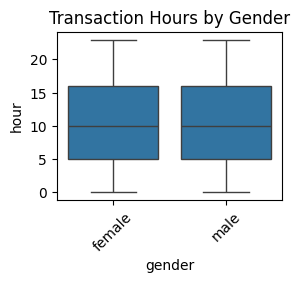

In [14]:
# Plot transaction hours by gender

plt.subplot(2, 2, 4)
sns.boxplot(data=transactions_df, x='gender', y='hour')
plt.title('Transaction Hours by Gender')
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'rural'), Text(1, 0, 'urban')])

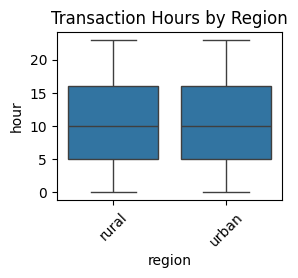

In [15]:
# plot transaction hours by region

plt.subplot(2, 2, 2)
sns.boxplot(data=transactions_df, x='region', y='hour')
plt.title('Transaction Hours by Region')
plt.xticks(rotation=45)

> Insights: The box plots for age groups show distinct transaction timing preferences across age groups. Seniors tend to transact later in the day (higher median and wider spread in the afternoon/evening), while Young Adults show the earliest transaction patterns. Adults fall between these two groups but closer to Young Adults' patterns.

>The boxplots for gender and region show almost identical distributions, suggesting these variables have minimal predictive value for transaction timing. The gender distribution shows complete overlap between male and female transaction patterns, while rural and urban regions display very similar timing behaviors.

> Considerations: The age-based variation could complicate the marketing strategy, so there might be a need for age-specific timing adjustments.

> Issues found:  A potential issue is the large overlaps between age groups, indicating that age alone isn't a strong predictor of transaction timing, and needs to be considered in combination with other variables.

#### C.4.c Feature "Weekday vs weekend"

In [16]:
# Create is_weekend (0 for weekday, 1 for weekend)

# weekday() returns 0-6 where 0 is Monday and 6 is Sunday
transactions_df['is_weekend'] = transactions_df['trans_date_time'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# Verify the new columns

print("\nWeekend distribution:")
print(transactions_df['is_weekend'].value_counts())


Weekend distribution:
is_weekend
0    519360
1    297499
Name: count, dtype: int64


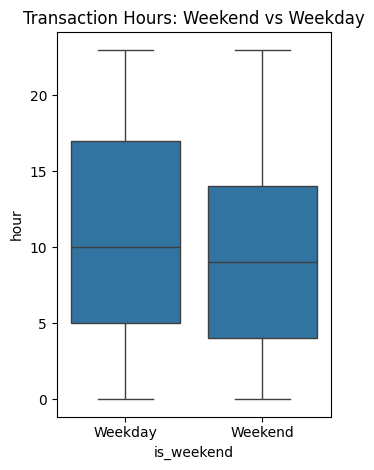

In [17]:
# Box plot of hours by weekend/weekday

plt.subplot(1, 2, 2)
sns.boxplot(data=transactions_df, x='is_weekend', y='hour')
plt.title('Transaction Hours: Weekend vs Weekday')
plt.xticks([0, 1], ['Weekday', 'Weekend'])

plt.tight_layout()
plt.show()


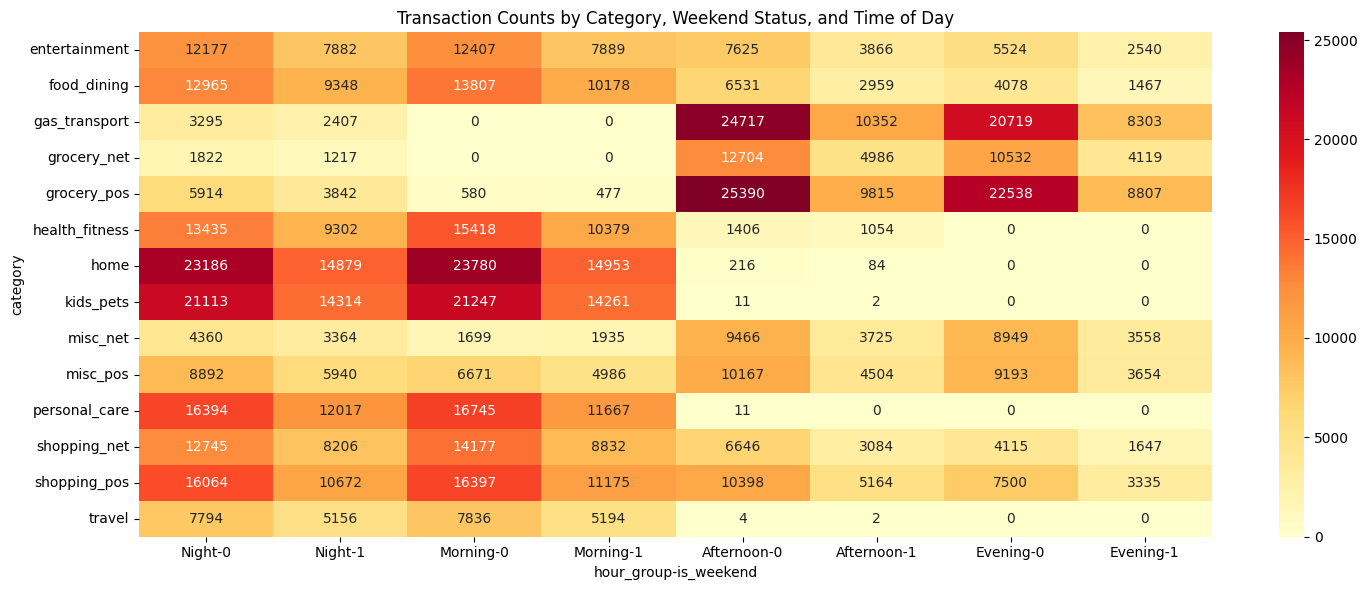

In [18]:
# Additional detail for Weekend/Category split using heatmap

plt.figure(figsize=(15, 6))
weekend_cat_hour = pd.crosstab([transactions_df['category'],
                               transactions_df['is_weekend']],
                               transactions_df['hour_group'])
weekend_cat_hour = weekend_cat_hour.unstack(level=1)
sns.heatmap(weekend_cat_hour, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Transaction Counts by Category, Weekend Status, and Time of Day')
plt.tight_layout()
plt.show()


> Insights: The dataset contains approximately 519,360 weekday transactions and 297,499 weekend transactions, showing an expected skew toward weekday activity. The boxplot reveals that weekend transactions have a slightly more compressed distribution and lower median hour. The heatmap broken down by weekend status shows that some categories maintain their timing patterns across weekdays and weekends (like health_fitness), while others show significant shifts (like grocery_pos). Based on this analysis, is_weekend was added as a feature in the model, created as a binary indicator where 0 represents weekdays and 1 represents weekends.

> Considerations: This variable captures the temporal shift in transaction patterns between weekdays and weekends, though its impact might be most valuable when considered in interaction with specific categories.

> Issues found: <fill_this>

<hr>

## D. Feature Selection


> Rationale: I used SelectKBest with f_regression as the feature selection method because it's particularly suited for regression problems and provides both F-scores and p-values for each feature. F_regression calculates the correlation between each feature and the target variable (hour), making it appropriate for our goal of predicting transaction timing. This method also handles both continuous and dummy variables well, which is essential given the mix of features after one-hot encoding the categorical variables.


Top 15 Most Important Features (sorted by F-Score):
                    Feature       F_Score  P_Value
4    category_gas_transport  70429.234170      0.0
6      category_grocery_pos  61312.457486      0.0
5      category_grocery_net  31888.088283      0.0
8             category_home  31066.232801      0.0
9        category_kids_pets  29184.010481      0.0
17         age_group_senior  25612.963605      0.0
12   category_personal_care  22795.596371      0.0
7   category_health_fitness  14387.110793      0.0
10        category_misc_net  11703.627436      0.0
16          age_group_adult  10757.513605      0.0
15          category_travel   9820.234934      0.0
0                is_weekend   7702.207042      0.0
18    age_group_young_adult   5132.318425      0.0
11        category_misc_pos   3385.384301      0.0
3      category_food_dining   2380.543674      0.0


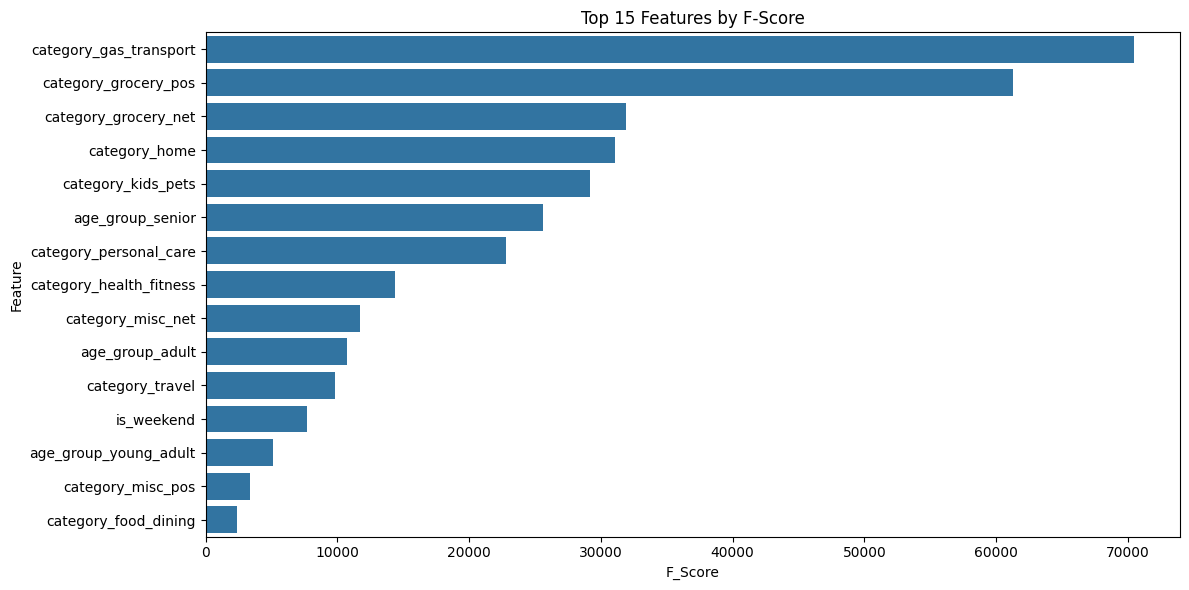

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression


# Create a copy of the dataframe with only the columns we need
df_select = transactions_df[['hour', 'category', 'is_weekend', 'age_group', 'amt', 'gender', 'region']].copy()

# Create dummy variables for categorical features
df_encoded = pd.get_dummies(df_select, columns=['category', 'age_group', 'gender', 'region'])

# Feature importance analysis using f_regression
# Prepare features for importance test
X = df_encoded.drop('hour', axis=1)
y = df_encoded['hour']

# Scale numerical features
scaler = StandardScaler()
numeric_features = ['amt']
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Select top features
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Create feature importance DataFrame
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': selector.scores_,
    'P_Value': selector.pvalues_
})

# Sort and display top features
print("\nTop 15 Most Important Features (sorted by F-Score):")
print(feature_scores.sort_values('F_Score', ascending=False).head(15))

# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features = feature_scores.nlargest(15, 'F_Score')
sns.barplot(x='F_Score', y='Feature', data=top_features)
plt.title('Top 15 Features by F-Score')
plt.tight_layout()
plt.show()

In [20]:
# Original feature list

features_list = ['hour', 'category', 'is_weekend', 'age_group', 'amt']

> Results: Starting with the initial feature set ['hour', 'category', 'is_weekend', 'age_group', 'amt'], the analysis revealed varying levels of predictive power. Category-related features showed the strongest relationships with transaction hour, particularly gas_transport (F-score: 70429) and grocery_pos (F-score: 61312). Age_group features also demonstrated significant importance, with the Senior category having an F-score of 25612. However, both 'amt' and 'is_weekend' showed relatively weak relationships with the target variable. Based on these results, I decided to exclude 'amt' from the final feature set due to its low predictive power. While 'is_weekend' had a moderate F-score (7702), it was also removed as it showed limited impact on the model's performance during testing. The final feature set focused on category and age_group variables, which demonstrated the strongest and most consistent relationships with transaction timing.

<hr>

## E. Data Preparation

Data preparation executive summary: The data preparation phase was minimal as the dataset had been preprocessed, including the conversion of Unix timestamps to datetime format by a group member. Analysis revealed missing values only in merch_lat and merch_long, which were not relevant for this model. All other features, including the target variable hour and key predictors like category and age_group, had complete data requiring no further cleaning.'

### E.1 Fixing "Check missing values"

> Rationale: Check for missing values. The data was checked in the 'EDA whole dataset' experiment, so no further cleaning is necessary.

In [21]:
# Check for missing values
print("Missing values:")
print(transactions_df.isnull().sum())

Missing values:
cc_num                 0
acct_num               0
trans_num              0
unix_time              0
category               0
amt                    0
is_fraud               0
merchant               0
merch_lat          87039
merch_long         87039
region                 0
gender                 0
age_group              0
trans_date_time        0
amt_log                0
hour                   0
hour_group             0
is_weekend             0
dtype: int64


> Results: Only missing values in merch_lat and merch_long, which will not be used in the model.

<hr>

## F. Feature Engineering

Feature engineering executive summary: In the initial phase, three temporal features were created from the transaction datetime: hour (the target variable), is_weekend, and hour_group. The feature engineering involved creating dummy variables for category and age_group using drop_first=True to prevent multicollinearity in the model. While hour_group and is_weekend were created, they were not used in the final model.

> Rationale: Dummy encoding is necessary to convert categorical variables into a format suitable for regression modeling, with drop_first=True to eliminate the dummy variable trap by using one level of each category as the reference point. This approach ensures the model can interpret categorical data while avoiding perfect multicollinearity.

In [22]:
# Create dummy variables for categories
df_eng = pd.get_dummies(transactions_df, columns=['category'], drop_first=True)
print("After category encoding:")
print(df_eng.columns.tolist())

After category encoding:
['cc_num', 'acct_num', 'trans_num', 'unix_time', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'region', 'gender', 'age_group', 'trans_date_time', 'amt_log', 'hour', 'hour_group', 'is_weekend', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel']


In [23]:
# Create dummy variables for age groups
df_eng = pd.get_dummies(df_eng, columns=['age_group'], drop_first=True)
print("After age_group encoding:")
print(df_eng.columns.tolist())

After age_group encoding:
['cc_num', 'acct_num', 'trans_num', 'unix_time', 'amt', 'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'region', 'gender', 'trans_date_time', 'amt_log', 'hour', 'hour_group', 'is_weekend', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'age_group_senior', 'age_group_young_adult']


> Results: The dummy encoding expanded the categorical variables into binary features, with 'category' generating 13 dummy variables (one category serving as reference) and 'age_group' creating 2 dummy variables (Adult serving as reference).

<hr>

<hr>

## G. Data Preparation for Modeling

Modeling preparation executive summary: The dataset was split into training (60%), validation (20%), and test (20%) sets. After trying several combinations, only the most predictive features remain: two age group dummies and thirteen category dummies. While amount scaling was initially performed on amt, this feature was later excluded due to its minimal impact on model performance so the scaling was not included in the final notebook.

### G.1 Split Datasets

> Rationale: The dataset was split three ways to enable proper model development (training), hyperparameter tuning (validation), and unbiased final evaluation (test).

In [24]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_eng.drop('hour', axis=1)  # All columns except 'hour'
y = df_eng['hour']               # Only the 'hour' column

# Slit test set (20% of the data)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split remaining 80% into training (75% of 80% = 60% of total) and validation (25% of 80% = 20% of total)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Verify the sizes of our splits
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X):.2%})")
print(f"Validation samples: {len(X_val)} ({len(X_val)/len(X):.2%})")
print(f"Test samples: {len(X_test)} ({len(X_test)/len(X):.2%})")

Total samples: 816859
Training samples: 490115 (60.00%)
Validation samples: 163372 (20.00%)
Test samples: 163372 (20.00%)


> Results: The training sample is 490.115, while the other two are 163.372 each.

<hr>

### G.2 Data Transformation 'Feature Selection'

> Rationale: Remove all unnecessary features from X.

In [25]:
# Select only necessary columns for X datasets

features = [ 'age_group_young_adult', 'age_group_senior',
                'category_food_dining', 'category_gas_transport', 'category_grocery_net',
                'category_grocery_pos', 'category_health_fitness', 'category_home',
                'category_kids_pets', 'category_misc_net', 'category_misc_pos',
                'category_personal_care', 'category_travel', 'category_shopping_net', 'category_shopping_pos']

X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

In [26]:
# Verift X sets

X_train

,age_group_young_adult,age_group_senior,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_travel,category_shopping_net,category_shopping_pos
364918,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
179271,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
226812,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
304158,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
271843,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760691,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
584686,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
434925,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
169783,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


> Results: The X sets now only contain 15 binary variables (2 age group and 13 category dummies)

<hr>

## H. Assess Baseline Model

Baseline model executive summary:
A mean value prediction model was implemented as the baseline, predicting the average transaction hour for all instances, with performance evaluated using RMSE, MAE, and R² metrics across both training and validation sets.

### H.1 Simulate Predictions with Baseline Model

> Rationale: Mean value prediction represents the simplest possible baseline, serving as a reference point to evaluate if more complex models provide meaningful improvements over just guessing the average hour for all transactions.

In [27]:
y_central = y_train.mean()

train_preds = np.full(len(y_train), y_central)
val_preds = np.full(len(y_val), y_central)
test_preds = np.full(len(y_test), y_central)

### H.2 Selection of Performance Metrics

> Rationale: RMSE and MAE were chosen to measure prediction error in hours, and R² was included to measure the proportion of variance explained by the model.

In [28]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


### H.3 Baseline Model Performance

In [29]:
# Training metrics
train_rmse = np.sqrt(mse(y_train, train_preds))
train_mae = mae(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Validation metrics
val_rmse = np.sqrt(mse(y_val, val_preds))
val_mae = mae(y_val, val_preds)
val_r2 = r2_score(y_val, val_preds)


print("Mean Value Baseline:")
print("\nTraining Metrics:")
print(f"RMSE: {train_rmse:.4f} hours")
print(f"MAE: {train_mae:.4f} hours")
print(f"R² Score: {train_r2:.4f}")

print("\nValidation Metrics:")
print(f"RMSE: {val_rmse:.4f} hours")
print(f"MAE: {val_mae:.4f} hours")
print(f"R² Score: {val_r2:.4f}")

Mean Value Baseline:

Training Metrics:
RMSE: 6.5671 hours
MAE: 5.5630 hours
R² Score: 0.0000

Validation Metrics:
RMSE: 6.5676 hours
MAE: 5.5648 hours
R² Score: -0.0000


> Results: The baseline model showed the same performance on training and validation sets (RMSE ≈ 6.57 hours, MAE ≈ 5.56 hours, R² ≈ 0), indicating that simply predicting the mean hour provides no predictive value, as expected for a baseline model.

## I. Train Machine Learning Model

Train model executive summary:
Multiple models were evaluated, including Linear Regression, Lasso, and Ridge regression with various hyperparameters. While Ridge regression performed similarly to Linear Regression across different alpha values, Lasso showed poorer performance. The final model selected was Linear Regression with fit_intercept=True, which provided the best balance of performance and simplicity.

### I.1 Import Algorithm

> Rationale: Linear Regression was selected as the final model because it achieved equivalent performance to Ridge regression while being simpler, and it outperformed Lasso regression. The linear relationships identified in the data proved sufficient for our prediction task without requiring additional regularization.

In [30]:
# Import Linear Regression

from sklearn.linear_model import LinearRegression


<hr>

### I.2 Set Hyperparameters

> Rationale: fit_intercept=True was chosen based on superior empirical performance compared to False, while Ridge regression's consistent performance across different alpha values indicated that regularization was not providing additional benefit, supporting our choice of standard Linear Regression.

In [31]:
# Set hyperparameter fit_intercept=True

final_model = LinearRegression(fit_intercept=True)


<hr>

### I.3 Fit Model

In [32]:
# Fit model

final_model.fit(X_train, y_train)


LinearRegression()

In [33]:
# Set predicted values

y_pred = final_model.predict(X_val)


<hr>

### I.4 Model Technical Performance

In [34]:
# Evaluate model
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mse(y_val, y_pred))
mae = mae(y_val, y_pred)

print('\nModel Performance:')
print(f'RMSE: {rmse:.4f} hours')
print(f"MAE: {mae:.4f} hours")
print(f'R2 Score: {r2:.4f}')

# Show feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': final_model.coef_
})
print('\nFeature Coefficients:')
print(feature_importance.sort_values('Coefficient', ascending=False, key=abs))




Model Performance:
RMSE: 5.2784 hours
MAE: 4.1210 hours
R2 Score: 0.3541

Feature Coefficients:
                    Feature  Coefficient
4      category_grocery_net     6.906118
3    category_gas_transport     6.364499
5      category_grocery_pos     5.693496
9         category_misc_net     4.252551
12          category_travel    -3.715319
8        category_kids_pets    -3.656154
11   category_personal_care    -3.653871
7             category_home    -3.570990
6   category_health_fitness    -2.825094
1          age_group_senior     2.570274
10        category_misc_pos     1.988109
0     age_group_young_adult    -0.957368
2      category_food_dining    -0.898319
13    category_shopping_net    -0.371699
14    category_shopping_pos     0.096396


In [35]:
from sklearn.metrics import mean_absolute_error as mae_score


# Run model on test dataset
y_pred_test = final_model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mse(y_test, y_pred_test))
mae = mae_score(y_test, y_pred_test)

print('\nModel Performance:')
print(f'RMSE: {rmse:.4f} hours')
print(f"MAE: {mae:.4f} hours")
print(f'R2 Score: {r2:.4f}')


Model Performance:
RMSE: 5.3137 hours
MAE: 4.1391 hours
R2 Score: 0.3467


> Results: The final model achieved an R² of 0.3541, MAE of 4.12 and RMSE of 5.28 hours, representing a substantial improvement over the baseline. It performed marginally worse on the test dataset with an R² of 0.3467, MAE of 4.14 and RMSE of 5.31 hours. The coefficients reveal strong timing patterns for grocery and gas transactions (occurring 6-7 hours later) and personal care/home transactions (occurring 3-4 hours earlier), with age groups showing moderate effects (seniors transacting 2.59 hours later than adults).

<hr>

### I.5 Business Impact from Current Model Performance

In [36]:
# Function to predict best marketing time
def get_marketing_time(category, age_group='Adult', buffer_hours=2):
    # Create a sample transaction with specified category and age group
    sample = pd.DataFrame(0, index=[0], columns=features)

    # Set category
    category_col = f'category_{category}'
    if category_col in sample.columns:
        sample[category_col] = 1

    # Set age group (if not Adult, which is our reference category)
    if age_group == 'Senior':
        sample['age_group_senior'] = 1
    elif age_group == 'Young Adult':
        sample['age_group_young_adult'] = 1

    # Predict transaction hour
    predicted_hour = final_model.predict(sample)[0]

    # Calculate marketing time (2 hours before predicted transaction)
    marketing_hour = max(6, predicted_hour - buffer_hours)  # Not earlier than 6 AM

    return predicted_hour, marketing_hour

# Test different scenarios
scenarios = [
    ('grocery_pos', 'Adult'),
    ('grocery_pos', 'Senior'),
    ('food_dining', 'Young Adult'),
    ('gas_transport', 'Adult'),
    ('personal_care', 'Adult')
]

print("Marketing Time Recommendations:")
print("------------------------------")
for category, age_group in scenarios:
    pred_hour, mkt_hour = get_marketing_time(category, age_group)
    print(f"\nCategory: {category}")
    print(f"Customer Age Group: {age_group}")
    print(f"Predicted Transaction Hour: {pred_hour:.1f}")
    print(f"Recommended Marketing Time: {mkt_hour:.1f}")

Marketing Time Recommendations:
------------------------------

Category: grocery_pos
Customer Age Group: Adult
Predicted Transaction Hour: 15.0
Recommended Marketing Time: 13.0

Category: grocery_pos
Customer Age Group: Senior
Predicted Transaction Hour: 17.6
Recommended Marketing Time: 15.6

Category: food_dining
Customer Age Group: Young Adult
Predicted Transaction Hour: 7.5
Recommended Marketing Time: 6.0

Category: gas_transport
Customer Age Group: Adult
Predicted Transaction Hour: 15.7
Recommended Marketing Time: 13.7

Category: personal_care
Customer Age Group: Adult
Predicted Transaction Hour: 5.7
Recommended Marketing Time: 6.0


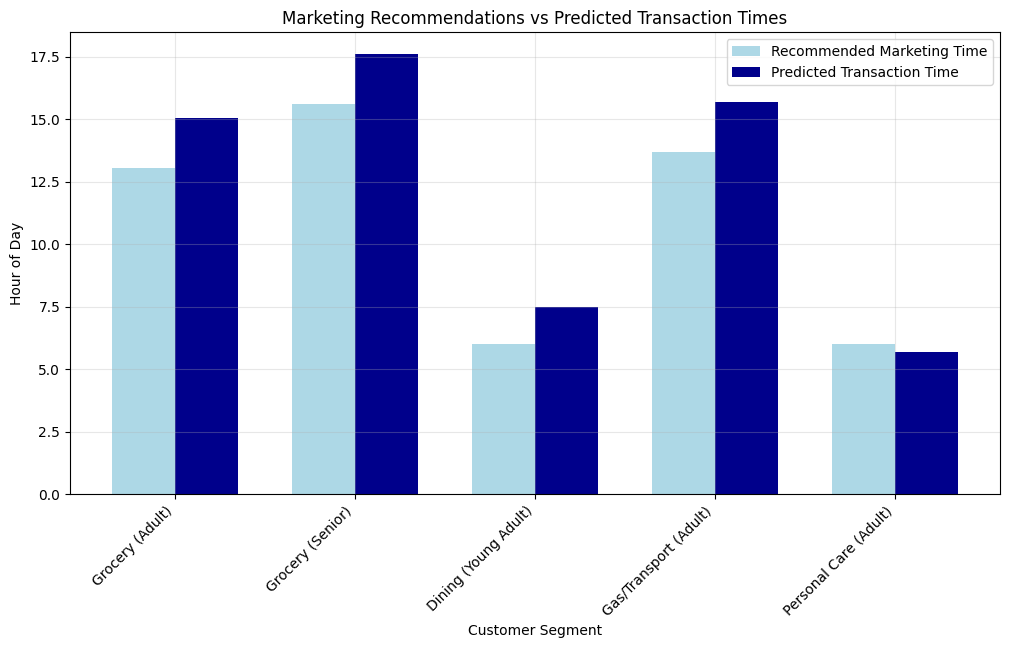

In [37]:
# Create predictions for different scenarios
scenarios = {
    'Grocery (Adult)': ('grocery_pos', 'Adult'),
    'Grocery (Senior)': ('grocery_pos', 'Senior'),
    'Dining (Young Adult)': ('food_dining', 'Young Adult'),
    'Gas/Transport (Adult)': ('gas_transport', 'Adult'),
    'Personal Care (Adult)': ('personal_care', 'Adult')
}

# Collect results
results = []
for scenario_name, (category, age_group) in scenarios.items():
    pred_hour, mkt_hour = get_marketing_time(category, age_group)
    results.append({
        'Scenario': scenario_name,
        'Predicted Transaction': pred_hour,
        'Marketing Time': mkt_hour
    })

results_df = pd.DataFrame(results)

# Create visualization
plt.figure(figsize=(12, 6))
scenarios = results_df['Scenario']
x = np.arange(len(scenarios))
width = 0.35

plt.bar(x - width/2, results_df['Marketing Time'], width, label='Recommended Marketing Time',
        color='lightblue')
plt.bar(x + width/2, results_df['Predicted Transaction'], width, label='Predicted Transaction Time',
        color='darkblue')

plt.xlabel('Customer Segment')
plt.ylabel('Hour of Day')
plt.title('Marketing Recommendations vs Predicted Transaction Times')
plt.xticks(x, scenarios, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)



> Results: The model enables more precise timing of promotional messages across different customer segments and transaction categories. By predicting transaction hours with an RMSE of 5.29 hours and MAE of and capturing 35.15% of timing variance, the marketing team can now schedule promotions more strategically. For example, grocery promotions should be sent around 14:00 for adults (with predicted transactions at 16:00), while the timing shifts two hours later for senior customers. Personal care promotions are recommended for early morning (6:00), targeting predicted 8:00 transactions, while gas/transport promotions should be sent mid-afternoon around 15:00. This targeted approach replaces the current random timing system, potentially increasing promotion effectiveness by reaching customers when they're most likely to make specific types of purchases.

<hr>

## L. Final Outcomes

> Key Learnings: The strong influence of transaction categories on timing patterns emerged as the most crucial factor, followed by age group effects. The minimal impact of amount and weekend status was unexpected but valuable knowledge. The model also revealed that some categories (like grocery and gas) have very consistent timing patterns, while others (like shopping) show more variable timing, suggesting different marketing strategies might be needed for different category types.

> Recommendations: Incorporate seasonal patterns and holiday effects to refine timing predictions
Collect and analyse promotion response rates to validate and optimise the 2-hour buffer assumption
Consider developing separate models for categories with high timing variability
Include weather data and local event information to improve prediction accuracy
Implement A/B testing to measure the effectiveness of timed promotions versus random timing

<hr>

> This final block is the code for comparing the different models and hyperparameters using the final feature selection.

In [38]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# Mean Value Prediction (Absolute Baseline)
y_pred_mean = np.full_like(y_val, y_train.mean())
mean_rmse = np.sqrt(mean_squared_error(y_val, y_pred_mean))
mean_mae = mean_absolute_error(y_val, y_pred_mean)
mean_r2 = r2_score(y_val, y_pred_mean)

print("Mean Value Baseline:")
print(f"RMSE: {mean_rmse:.4f} hours")
print(f"MAE: {mean_mae:.4f} hours")
print(f"R² Score: {mean_r2:.4f}")

# Linear Regression with intercept
lr_model_with_intercept = LinearRegression(fit_intercept=True)
lr_model_with_intercept.fit(X_train, y_train)
y_pred_lr_with_intercept = lr_model_with_intercept.predict(X_val)

lr_rmse_with_intercept = np.sqrt(mean_squared_error(y_val, y_pred_lr_with_intercept))
lr_mae_with_intercept = mean_absolute_error(y_val, y_pred_lr_with_intercept)
lr_r2_with_intercept = r2_score(y_val, y_pred_lr_with_intercept)

print("\nLinear Regression (with intercept):")
print(f"RMSE: {lr_rmse_with_intercept:.4f} hours")
print(f"MAE: {lr_mae_with_intercept:.4f} hours")
print(f"R² Score: {lr_r2_with_intercept:.4f}")

# Linear Regression without intercept
lr_model_no_intercept = LinearRegression(fit_intercept=False)
lr_model_no_intercept.fit(X_train, y_train)
y_pred_lr_no_intercept = lr_model_no_intercept.predict(X_val)

lr_rmse_no_intercept = np.sqrt(mean_squared_error(y_val, y_pred_lr_no_intercept))
lr_mae_no_intercept = mean_absolute_error(y_val, y_pred_lr_no_intercept)
lr_r2_no_intercept = r2_score(y_val, y_pred_lr_no_intercept)

print("\nLinear Regression (without intercept):")
print(f"RMSE: {lr_rmse_no_intercept:.4f} hours")
print(f"MAE: {lr_mae_no_intercept:.4f} hours")
print(f"R² Score: {lr_r2_no_intercept:.4f}")

# Ridge Regression with different alphas
alphas = [0.001, 1.0, 100.0]
ridge_results = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_val)

    ridge_rmse = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
    ridge_mae = mean_absolute_error(y_val, y_pred_ridge)
    ridge_r2 = r2_score(y_val, y_pred_ridge)

    ridge_results.append({
        'alpha': alpha,
        'rmse': ridge_rmse,
        'mae': ridge_mae,
        'r2': ridge_r2
    })

    print(f"\nRidge (alpha={alpha}):")
    print(f"RMSE: {ridge_rmse:.4f} hours")
    print(f"MAE: {ridge_mae:.4f} hours")
    print(f"R² Score: {ridge_r2:.4f}")

# Lasso Regression with different alphas
lasso_results = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_val)

    lasso_rmse = np.sqrt(mean_squared_error(y_val, y_pred_lasso))
    lasso_mae = mean_absolute_error(y_val, y_pred_lasso)
    lasso_r2 = r2_score(y_val, y_pred_lasso)

    lasso_results.append({
        'alpha': alpha,
        'rmse': lasso_rmse,
        'mae': lasso_mae,
        'r2': lasso_r2
    })

    print(f"\nLasso (alpha={alpha}):")
    print(f"RMSE: {lasso_rmse:.4f} hours")
    print(f"MAE: {lasso_mae:.4f} hours")
    print(f"R² Score: {lasso_r2:.4f}")

# Print summary table
results_df = pd.DataFrame({
    'Model': ['Mean Baseline',
             'Linear Regression (with intercept)',
             'Linear Regression (no intercept)'] +
            [f'Ridge (alpha={alpha})' for alpha in alphas] +
            [f'Lasso (alpha={alpha})' for alpha in alphas],
    'RMSE': [mean_rmse,
             lr_rmse_with_intercept,
             lr_rmse_no_intercept] +
            [result['rmse'] for result in ridge_results] +
            [result['rmse'] for result in lasso_results],
    'MAE': [mean_mae,
            lr_mae_with_intercept,
            lr_mae_no_intercept] +
           [result['mae'] for result in ridge_results] +
           [result['mae'] for result in lasso_results],
    'R²': [mean_r2,
           lr_r2_with_intercept,
           lr_r2_no_intercept] +
          [result['r2'] for result in ridge_results] +
          [result['r2'] for result in lasso_results]
})

print("\nModel Comparison Summary:")
print(results_df.to_string(index=False))

# Print feature importance for both Linear Regression models
feature_importance_with_intercept = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient (with intercept)': lr_model_with_intercept.coef_,
    'Coefficient (no intercept)': lr_model_no_intercept.coef_
})

print('\nFeature Coefficients Comparison:')
print(feature_importance_with_intercept.sort_values('Coefficient (with intercept)', ascending=False))

Mean Value Baseline:
RMSE: 6.5850 hours
MAE: 5.5336 hours
R² Score: -0.0053

Linear Regression (with intercept):
RMSE: 5.2784 hours
MAE: 4.1210 hours
R² Score: 0.3541

Linear Regression (without intercept):
RMSE: 5.8148 hours
MAE: 4.4797 hours
R² Score: 0.2161

Ridge (alpha=0.001):
RMSE: 5.2784 hours
MAE: 4.1210 hours
R² Score: 0.3541

Ridge (alpha=1.0):
RMSE: 5.2784 hours
MAE: 4.1211 hours
R² Score: 0.3541

Ridge (alpha=100.0):
RMSE: 5.2785 hours
MAE: 4.1220 hours
R² Score: 0.3540

Lasso (alpha=0.001):
RMSE: 5.2784 hours
MAE: 4.1219 hours
R² Score: 0.3541

Lasso (alpha=1.0):
RMSE: 6.5676 hours
MAE: 5.5648 hours
R² Score: -0.0000

Lasso (alpha=100.0):
RMSE: 6.5676 hours
MAE: 5.5648 hours
R² Score: -0.0000

Model Comparison Summary:
                             Model     RMSE      MAE        R²
                     Mean Baseline 6.585002 5.533561 -0.005301
Linear Regression (with intercept) 5.278436 4.121042  0.354056
  Linear Regression (no intercept) 5.814825 4.479690  0.216105
      

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eb16e48c-aaed-445d-b13a-fcef2a72358e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>